In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


df_train = pd.read_csv("/content/drive/MyDrive/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/test.csv")

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the train dataset
train_df = pd.read_csv("/content/drive/MyDrive/train.csv")
X_train = train_df['pixels'].apply(lambda x: pd.Series(x.split(' ')).astype(float))
y_train = train_df['emotion']

# Load the test dataset
test_df = pd.read_csv("/content/drive/MyDrive/test.csv")
X_test = test_df['pixels'].apply(lambda x: pd.Series(x.split(' ')).astype(float))
y_test = None  # Replace with the actual target labels if available

# Load the icml_face_data dataset
icml_df = pd.read_csv("/content/drive/MyDrive/icml_face_data.csv")
X_icml = icml_df[' pixels'].apply(lambda x: pd.Series(x.split(' ')).astype(float))
y_icml = icml_df['emotion']

# Preprocess the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_icml_scaled = scaler.transform(X_icml)

# Create and train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train_scaled, y_train)

# Predict on the training dataset
y_pred_train = clf.predict(X_train_scaled)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy on training dataset:", accuracy_train)

# Predict on the test dataset if available
if y_test is not None:
    y_pred_test = clf.predict(X_test_scaled)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    print("Accuracy on test dataset:", accuracy_test)

# Predict on the icml_face_data dataset
y_pred_icml = clf.predict(X_icml_scaled)
accuracy_icml = accuracy_score(y_icml, y_pred_icml)
print("Accuracy on icml_face_data dataset:", accuracy_icml)

Accuracy on training dataset: 0.9985022118499425
Accuracy on icml_face_data dataset: 0.8616490651210745


df_train = pd.read_csv("/content/drive/MyDrive/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/test.csv")

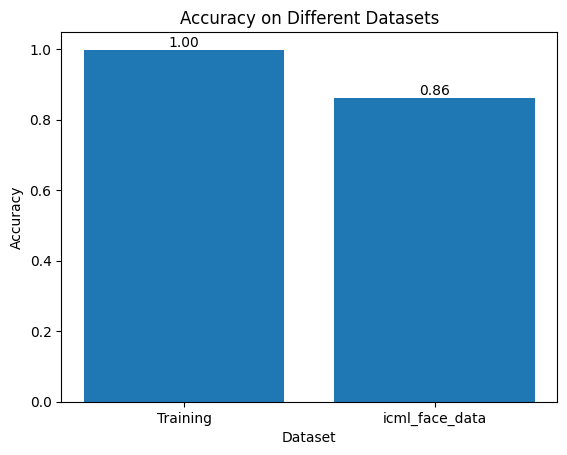

In [ ]:
import matplotlib.pyplot as plt

# Define the dataset names and accuracies
datasets = ['Training', 'icml_face_data']
accuracies = [accuracy_train, accuracy_icml]

# Create a bar plot
plt.bar(datasets, accuracies)
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Accuracy on Different Datasets')

# Add the accuracy values on top of the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy, f'{accuracy:.2f}', ha='center', va='bottom')

# Show the plot
plt.show()
